In [6]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('Affectnet/training.csv')
train_df

,subDirectory_filePath,face_x,face_y,face_width,face_height,facial_landmarks,expression,valence,arousal
0,689/737db2483489148d783ef278f43f486c0a97e140fc...,134,134,899,899,181.64;530.91;188.32;627.82;195.1;723.37;205.2...,1,0.785714,-0.055556
1,392/c4db2f9b7e4b422d14b6e038f0cdc3ecee239b5532...,20,20,137,137,28.82;77.52;29.12;93.25;31.04;108.51;33.03;123...,0,-0.017253,0.004313
2,468/21772b68dc8c2a11678c8739eca33adb6ccc658600...,11,11,176,176,30.52;87.33;32.55;106.43;36.94;125.81;43.06;14...,0,0.174603,0.007937
3,944/06e9ae8d3b240eb68fa60534783eacafce2def60a8...,40,40,269,269,44.43;158.17;47.08;189.2;50.54;221.88;58.3;253...,1,0.153401,0.038890
4,993/02e06ee5521958b4042dd73abb444220609d96f57b...,22,22,153,153,50.59;78.72;48.6;93.23;48.72;109.06;48.8;123.0...,8,0.783972,-0.551684
...,...,...,...,...,...,...,...,...,...
414794,1215/65e2c4fe91780f417c0edf3c71561d0e41e4db248...,52,52,348,348,83.9;225.92;88.93;260.62;97.28;296.78;108.34;3...,2,-0.662960,-0.249501
414795,375/a0077b9ae7ab3fd9241dd0775cb9f88c1d8913c7af...,49,49,330,330,106.87;161.43;105.49;191.66;109.81;224.48;113....,2,-0.833333,-0.380952
414796,606/08e4e677c377461ec5400d74b4fd07dd6454cf2d7e...,28,28,191,191,52.53;97.98;50.5;116.98;50.65;136.12;53.3;155....,1,0.542562,-0.015803
414797,867/d5c098b92c063caf1c8761c9b4ee5d7a8c3c08f94b...,65,65,724,724,95.85;340.5;99.96;432.63;117.87;521.21;138.52;...,10,-2.000000,-2.000000


In [3]:
val_df = pd.read_csv('Affectnet/validation.csv')
val_df

,subDirectory_filePath,face_x,face_y,face_width,face_height,facial_landmarks,expression,valence,arousal
0,459/81456263be241927c7a59a2646f88c2700ce4b7cba...,147,147,981,981,233.58;512.99;246.97;623.96;262.53;733.87;285....,7,-0.653310,0.653310
1,680/cfa0c679da3dbe9f01e92cdeda2da1065aa50e7bf0...,99,99,666,666,98.98;341.86;107.43;422.6;123.41;503.32;144.97...,0,-0.176846,-0.077640
2,1042/83dac9d7eec7fb0bfef79b4d35ddc69a6f7fb458d...,16,16,133,133,42.69;79.9;42.94;90.59;43.83;101.27;44.2;112.5...,0,-0.367789,0.183895
3,887/49e4872adc501d5e69b8898930bbd4f4e037022874...,78,78,522,522,49.66;304.48;48.91;361.36;52.08;421.7;64.76;48...,4,-0.062911,0.532327
4,1057/0745dd0386476ae193ca709034378c9207e48ae88...,36,36,258,258,21.82;115.14;18.22;152.92;20.65;190.43;26.14;2...,0,0.004839,-0.004839
...,...,...,...,...,...,...,...,...,...
5495,957/66f024fee5e8dd72e9807787166ea5923d99ee5b03...,21,21,145,145,40.35;85.68;43.62;101.91;49.89;117.36;56.73;13...,3,-0.275842,0.590399
5496,417/8a553f8e144d055ee52f37a36025c157e2959ec393...,116,116,776,776,158.38;377.09;166.39;472.26;180.6;567.84;199.9...,2,-0.667828,-0.246806
5497,875/7c5fba7d0edf2b0a981e4b8804e63a034a61267bb1...,26,26,460,460,91.05;236.47;86.12;286.48;88.71;338.39;97.17;3...,10,-2.000000,-2.000000
5498,873/acaf1253cea3bf9753710218c980fd9c98b21e6003...,47,47,314,314,74.96;188.88;81.33;227.6;94.57;264.14;108.56;3...,8,0.000000,0.253968


In [4]:
train_df = train_df[~((train_df['expression'] == 10) | (train_df['expression'] == 9))].reset_index(drop=True)
val_df = val_df[~((val_df['expression'] == 10) | (val_df['expression'] == 9))].reset_index(drop=True)

In [5]:
print('train:', len(train_df))
print('val:', len(val_df))

train: 320739
val: 4500


In [8]:
len(np.array(train_df['arousal']))

320739

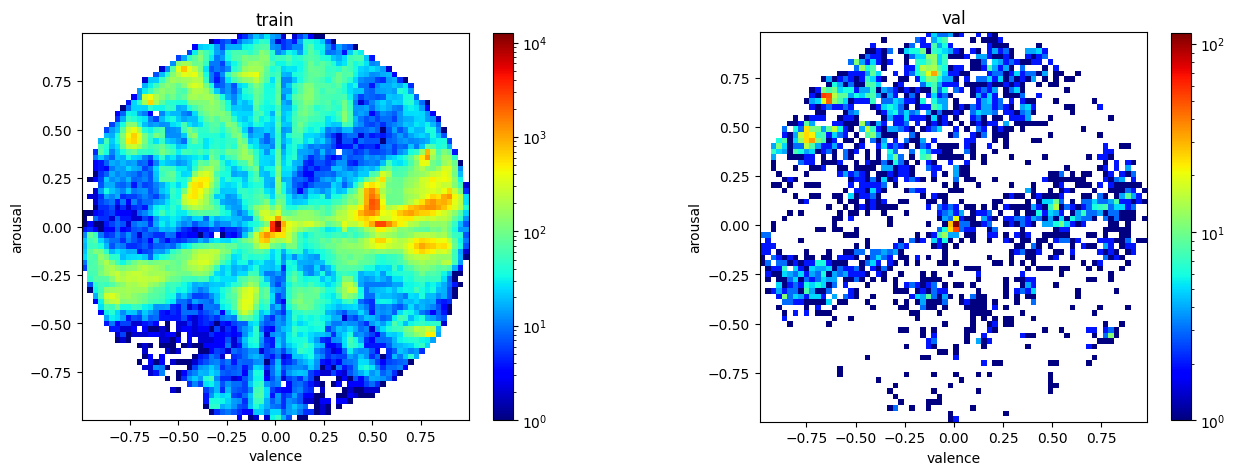

In [37]:
import matplotlib.cm as cm
import matplotlib.colors as cl

fig = plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i, df in enumerate([train_df, val_df]):
    x = np.array(df['valence'])
    y = np.array(df['arousal'])
    ax = fig.add_subplot(1, 2, i+1)
    ax.set_aspect('equal', adjustable='box')
    h = ax.hist2d(x,y, bins=70, cmap=cm.jet, norm=cl.LogNorm())
    ax.set_title(['train', 'val'][i])
    ax.set_xlabel('valence')
    ax.set_ylabel('arousal')
    fig.colorbar(h[3],ax=ax, shrink=0.335)
plt.show()

In [38]:
import wandb
wandb.init(id='test')


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rkn. Use `wandb login --relogin` to force relogin


In [40]:
wandb.log({'affectnet_histgram': wandb.Image(fig)})

In [41]:
wandb.finish()

In [13]:
import pandas as pd
from scipy.stats import gaussian_kde

train_df = pd.read_csv('Affectnet/training.csv')
train_df = train_df[~((train_df['expression'] == 10) | (train_df['expression'] == 9))].reset_index(drop=True)
train_valaro = train_df[['valence', 'arousal']].to_numpy().T
kernel = gaussian_kde(train_valaro, bw_method=0.2)

In [10]:
import numpy as np
xx,yy = np.mgrid[-1:1:0.02,-1:1:0.02]
positions = np.vstack([xx.ravel(),yy.ravel()])

In [11]:
positions.shape

(2, 10000)

In [40]:
eps = 1e-5

In [42]:
import torch
target = torch.randn(32, 2)
print(target)
torch.tensor(1 / (kernel(target.T) + eps)).T.float()

tensor([[-7.4699e-02,  1.2989e-01],
        [-7.8336e-01,  1.2745e+00],
        [ 1.1355e+00, -4.3791e-01],
        [ 2.1837e-01,  8.8941e-02],
        [ 4.8131e-03,  8.4227e-01],
        [ 1.1444e-01, -1.1964e+00],
        [-4.3866e-01, -1.5105e-03],
        [ 4.0498e-01,  1.2565e+00],
        [-7.2727e-01,  1.2188e+00],
        [ 1.0842e+00,  1.6684e-01],
        [ 2.0199e-01, -7.4353e-01],
        [ 3.2376e-01,  6.7323e-01],
        [-1.0521e-01,  1.6623e+00],
        [-3.6640e-01,  9.0236e-01],
        [-8.0020e-01,  9.3546e-01],
        [-1.0170e+00, -8.8915e-02],
        [-6.7579e-01,  1.1553e-03],
        [ 6.6083e-01,  1.9841e-02],
        [ 1.4030e+00,  1.1125e+00],
        [-1.9811e+00,  9.2083e-01],
        [-1.6611e-01,  1.2772e-01],
        [ 2.3495e-01,  1.1553e+00],
        [ 9.3799e-02,  1.4466e+00],
        [-1.4542e-01, -5.9063e-01],
        [ 3.7627e-01, -1.7496e+00],
        [-1.2984e+00, -5.1319e-02],
        [-1.4078e+00,  2.6298e-02],
        [-1.8941e-01,  7.105

tensor([1.7176e+00, 1.0000e+05, 2.2428e+03, 2.0423e+00, 4.1184e+00, 1.7110e+04,
        7.8930e+00, 9.9624e+04, 9.9969e+04, 6.4645e+00, 2.7643e+01, 5.0053e+00,
        1.0000e+05, 6.8063e+00, 1.6128e+03, 1.4370e+01, 2.2547e+01, 5.7048e-01,
        1.0000e+05, 1.0000e+05, 2.8155e+00, 5.6440e+03, 1.0000e+05, 1.8085e+01,
        1.0000e+05, 6.1316e+03, 9.0679e+04, 4.0301e+00, 4.8671e+00, 4.4072e+00,
        5.2360e+00, 1.0000e+05])

In [33]:
pred = torch.randn(32, 2, requires_grad=True)
target = torch.randn(32, 2)

In [37]:
import torch.nn as nn
import torch

loss = torch.mean(torch.dot(torch.tensor(kernel(target.T)).float(), ((pred - target) ** 2).sum(1)))
loss

tensor(5.2766, grad_fn=<MeanBackward0>)